1.0
[0.96666667 1.         1.         0.93333333 1.        ]
Accuracy 0.98(+/- 0.01)
[1 0 1 1 2 1 1 1 2 1 1 0 0 0 2 2 0 1 0 0 0 0 0 1 0 0 2 0 0 1 2 2 1 0 2 2 2
 2 2 0 0 1 2 1 1]
              precision    recall  f1-score   support

          c1       1.00      1.00      1.00        17
          c2       1.00      1.00      1.00        15
          c3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[1 0 1 1 2 1 1 1 2 1 1 0 0 0 2 2 0 1 0 0 0 0 0 1 0 0 2 0 0 1 2 2 1 0 2 2 2
 2 2 0 0 1 2 1 1]
[1 0 1 1 2 1 1 1 2 1 1 0 0 0 2 2 0 1 0 0 0 0 0 1 0 0 2 0 0 1 2 2 1 0 2 2 2
 2 2 0 0 1 2 1 1]
[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


C:\Users\Sachin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

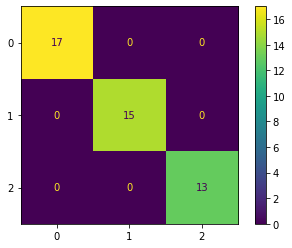

In [7]:

import sklearn.datasets
data = sklearn.datasets.load_iris()
x = data['data']
y =data['target']
labels =['target_names']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=10)
model = clf.fit(x_train,y_train)
z=clf.score(x_test,y_test)
print(z)
s=clf.predict(x_test)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,x,y,cv=5)
print(scores)
print("Accuracy %0.2f(+/- %0.2f)"%(scores.mean(),scores.std()/2))

#pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(),GaussianNB())
pipeline.fit(x_train,y_train)
pipeline.predict(x_test)
data.keys()

x.shape,y.shape
import numpy
numpy.unique(y)

from sklearn import svm
svm.SVC(kernel="linear").fit(x_train,y_train)
svm.SVC(kernel="linear").fit(x_train,y_train).predict(x_test)


from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
model= rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
print(pred)
from sklearn.metrics import classification_report
y_true=[0,1,2,2,1]
y_pred=[0,0,2,1,1]
target_names=['c1','c2','c3']

b=classification_report(s,pred,target_names=target_names)
print(b)

from sklearn.ensemble import GradientBoostingClassifier
gbc=  GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_test,y_test)

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pdict=dtc.predict(x_test)
print(pdict)

!pip install pydot
from sklearn.tree import export_graphviz
import pydot
from io import StringIO
from sklearn import tree
#dotfile = StringIO()
#tree.export_graphviz(dtc,out_file=dotfile)
#(graph,)=pydot.graph_from_dot_data(dotfile.getvalue())
#graph.write_png("dtc.png")
#graph.write_pdf("dtc.pdf")
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
pict = reg.predict(x_test)
print(pict)
from sklearn.metrics import confusion_matrix
X= confusion_matrix(y_test,pict,labels=reg.classes_)
print(X)
import sklearn.metrics as metrics
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=X,display_labels=[True,False])
cm.plot()